In [6]:
!pip install plotly

     |████████████████████████████████| 13.2 MB 2.4 MB/s eta 0:00:01    |██████                          | 2.5 MB 3.5 MB/s eta 0:00:04     |████████████████▊               | 6.9 MB 3.8 MB/s eta 0:00:02
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=29bcb89b9063a7cfbd9105121bb77e5db428916295f11513b8e1871ad7a07aa6
  Stored in directory: /home/jovyan/.cache/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [8]:
import numpy as np
np.random.seed(777)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [12]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          100000 non-null  int64
 1   feature_0   100000 non-null  int64
 2   feature_1   100000 non-null  int64
 3   feature_2   100000 non-null  int64
 4   feature_3   100000 non-null  int64
 5   feature_4   100000 non-null  int64
 6   feature_5   100000 non-null  int64
 7   feature_6   100000 non-null  int64
 8   feature_7   100000 non-null  int64
 9   feature_8   100000 non-null  int64
 10  feature_9   100000 non-null  int64
 11  feature_10  100000 non-null  int64
 12  feature_11  100000 non-null  int64
 13  feature_12  100000 non-null  int64
 14  feature_13  100000 non-null  int64
 15  feature_14  100000 non-null  int64
 16  feature_15  100000 non-null  int64
 17  feature_16  100000 non-null  int64
 18  feature_17  100000 non-null  int64
 19  feature_18  100000 non-null  int64
 20  featu

In [20]:
uniqueValues = train_df.nunique()
pd.set_option('display.max_rows', None)
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique value sin each column :
id            200000
feature_0         42
feature_1         37
feature_2         48
feature_3         59
feature_4         30
feature_5         55
feature_6         40
feature_7         26
feature_8         28
feature_9         51
feature_10        32
feature_11        37
feature_12        28
feature_13        40
feature_14        30
feature_15       105
feature_16        27
feature_17        15
feature_18        21
feature_19        66
feature_20        28
feature_21        31
feature_22        55
feature_23        21
feature_24        50
feature_25        40
feature_26        20
feature_27        49
feature_28        78
feature_29        58
feature_30        18
feature_31        36
feature_32        77
feature_33        41
feature_34        31
feature_35        39
feature_36        28
feature_37        26
feature_38        39
feature_39        47
feature_40        35
feature_41        56
feature_42        42
feature_43        53
feature_44     

In [21]:
uniqueValues = test_df.nunique()
pd.set_option('display.max_rows', None)
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
id            100000
feature_0         42
feature_1         37
feature_2         48
feature_3         59
feature_4         30
feature_5         55
feature_6         40
feature_7         26
feature_8         28
feature_9         51
feature_10        32
feature_11        37
feature_12        28
feature_13        40
feature_14        30
feature_15       103
feature_16        27
feature_17        15
feature_18        21
feature_19        66
feature_20        28
feature_21        31
feature_22        55
feature_23        21
feature_24        50
feature_25        40
feature_26        20
feature_27        49
feature_28        75
feature_29        58
feature_30        18
feature_31        36
feature_32        77
feature_33        41
feature_34        31
feature_35        39
feature_36        28
feature_37        26
feature_38        39
feature_39        47
feature_40        35
feature_41        56
feature_42        42
feature_43        53
feature_44     

In [10]:
train_df.drop(['id'],axis=1).describe().T.style.bar(subset=['mean'],color=px.colors.qualitative.G10[1]).background_gradient(subset=['std'],cmap='Blues').background_gradient(subset=['50%'],cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
feature_0,200000.000000,0.972710,3.941836,0.000000,0.000000,0.000000,1.000000,61.000000
feature_1,200000.000000,1.168365,3.993407,0.000000,0.000000,0.000000,1.000000,51.000000
feature_2,200000.000000,2.219325,6.476570,0.000000,0.000000,0.000000,1.000000,64.000000
feature_3,200000.000000,2.296735,7.551858,0.000000,0.000000,0.000000,1.000000,70.000000
feature_4,200000.000000,0.793530,2.935785,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,200000.000000,1.431105,5.162746,0.000000,0.000000,0.000000,1.000000,76.000000
feature_6,200000.000000,1.010695,3.949231,0.000000,0.000000,0.000000,0.000000,43.000000
feature_7,200000.000000,0.673090,2.234949,0.000000,0.000000,0.000000,0.000000,30.000000
feature_8,200000.000000,1.943980,3.931330,0.000000,0.000000,0.000000,2.000000,38.000000
feature_9,200000.000000,1.719655,5.916988,0.000000,0.000000,0.000000,1.000000,72.000000


In [13]:
test_df.drop(['id'],axis=1).describe().T.style.bar(subset=['mean'],color=px.colors.qualitative.G10[1]).background_gradient(subset=['std'],cmap='Blues').background_gradient(subset=['50%'],cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.990510,4.018930,0.000000,0.000000,0.000000,1.000000,61.000000
feature_1,100000.000000,1.168520,4.030234,0.000000,0.000000,0.000000,1.000000,51.000000
feature_2,100000.000000,2.182730,6.402817,0.000000,0.000000,0.000000,1.000000,64.000000
feature_3,100000.000000,2.316240,7.584742,0.000000,0.000000,0.000000,1.000000,70.000000
feature_4,100000.000000,0.792050,2.938386,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,1.435520,5.164174,0.000000,0.000000,0.000000,1.000000,76.000000
feature_6,100000.000000,1.016930,3.956569,0.000000,0.000000,0.000000,0.000000,43.000000
feature_7,100000.000000,0.679780,2.262651,0.000000,0.000000,0.000000,0.000000,30.000000
feature_8,100000.000000,1.945370,3.938406,0.000000,0.000000,0.000000,2.000000,38.000000
feature_9,100000.000000,1.716100,5.876687,0.000000,0.000000,0.000000,1.000000,72.000000


In [16]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train_df.describe() - test_df.describe())[test_df.columns].T.iloc[1:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
feature_0,-0.017800,-0.077094,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.000155,-0.036827,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,0.036595,0.073753,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,-0.019505,-0.032884,0.000000,0.000000,0.000000,0.000000,0.000000
feature_4,0.001480,-0.002601,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.004415,-0.001428,0.000000,0.000000,0.000000,0.000000,0.000000
feature_6,-0.006235,-0.007338,0.000000,0.000000,0.000000,0.000000,0.000000
feature_7,-0.006690,-0.027703,0.000000,0.000000,0.000000,0.000000,0.000000
feature_8,-0.001390,-0.007075,0.000000,0.000000,0.000000,0.000000,0.000000
feature_9,0.003555,0.040301,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='target', ylabel='count'>

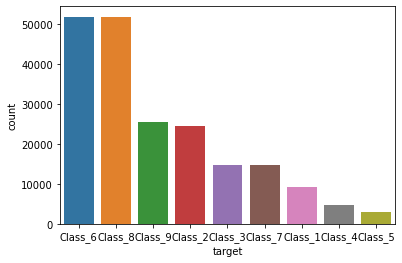

In [17]:
sns.countplot(x="target", data=train_df, order=train_df['target'].value_counts().index)